## Fourier Series

In [1]:
import json

In [2]:
with open("../history.json",'r') as f:
    data = json.load(f)

In [3]:
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [8]:
def normalize(values):
    values = np.array(values)
    mu = values.mean()
    std = values.std()
    return (values-mu)/std
    

In [9]:
normalized_T1 = normalize(data['V1']['value'])

In [10]:
fft = tf.signal.rfft(normalized_T1)

In [11]:
fft = np.abs(fft)

In [14]:
minutes_per_day = 60*24
minutes_pre_rev = len(fft)/minutes_per_day*np.argmax(fft)

In [15]:
f_per_dataset = np.arange(len(fft))

In [16]:
f_per_minute = f_per_dataset/minutes_per_day

In [17]:
def plot_frequency(data,ax = None):
    if ax == None:
        ax = plt.gca()
    fft = np.abs(tf.signal.rfft(data))
    f_per_dataset = np.arange(len(fft))
    plt.step(f_per_dataset,fft)
    plt.xscale('log')
    plt.xlim([1,100])
    plt.yscale("log")

([<matplotlib.axis.XTick at 0x16c06ffd0>,
 [Text(1, 0, '1 rev/ minute'), Text(2880, 0, '2 rev /day')])

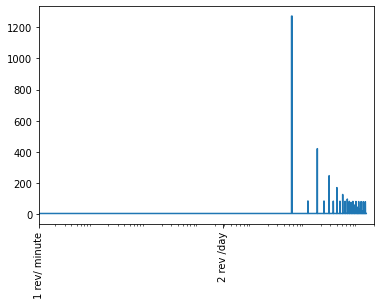

In [18]:
plt.step(f_per_dataset*60*24,fft)
plt.xscale('log')
plt.xticks([1,2*60*24],labels = ["1 rev/ minute","2 rev /day"],rotation=90)

(0.0, 300.0)

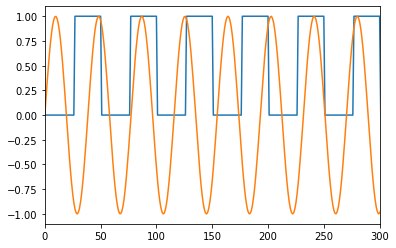

In [24]:
plt.plot(data['V1']['value'])
steps_per_day = 2000
minutes_per_step = minutes_per_day/steps_per_day
plt.plot(np.sin(np.pi*2*np.arange(steps_per_day)*minutes_per_step/minutes_pre_rev))
plt.xlim([0,300])

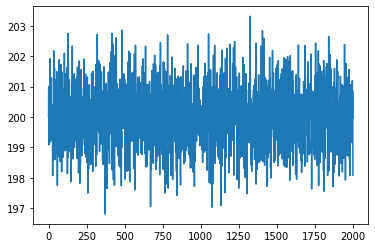

In [25]:
plt.plot(data['T3']['value'])

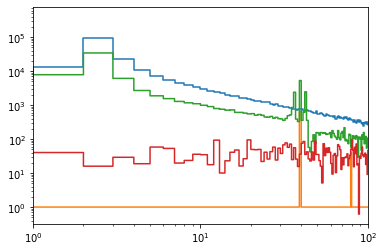

In [26]:
plt.figure()
ax = plt.gca()
plot_frequency(data['T1']['value'],ax=ax)
plot_frequency(data['V1']['value'],ax=ax)
plot_frequency(data['T2']['value'],ax=ax)
plot_frequency(data['T3']['value'],ax=ax)

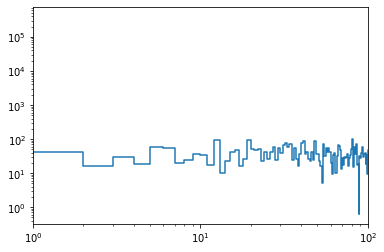

In [27]:
plot_frequency(data['T3']['value'])

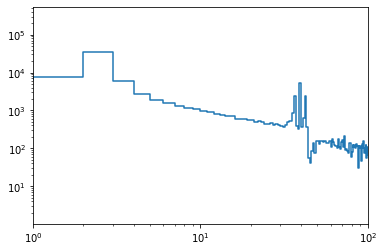

In [28]:
plot_frequency(data['T2']['value'])